Code to predict if an Employee will be eligible for a promotion or not?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the data:

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Getting the dataframe dimensions and getting datatype of each column for each dataframe:

In [3]:
dataTypeSeries = train.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)
print('Shape: '+ str(train.shape))

Data type of each column of Dataframe :
employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object
Shape: (54808, 13)


Finding the number of unique values and nan values in each column:

In [4]:
for c in train.columns.values:
  val_len = len(pd.unique(train[c]))
  print(c + ' has ' + str(val_len) + ' unique values and is of type ' + str(train[c].dtypes) + ' and has ' + str(train[c].isnull().sum()) + ' null values')

employee_id has 54808 unique values and is of type int64 and has 0 null values
department has 9 unique values and is of type object and has 0 null values
region has 34 unique values and is of type object and has 0 null values
education has 4 unique values and is of type object and has 2409 null values
gender has 2 unique values and is of type object and has 0 null values
recruitment_channel has 3 unique values and is of type object and has 0 null values
no_of_trainings has 10 unique values and is of type int64 and has 0 null values
age has 41 unique values and is of type int64 and has 0 null values
previous_year_rating has 6 unique values and is of type float64 and has 4124 null values
length_of_service has 35 unique values and is of type int64 and has 0 null values
awards_won? has 2 unique values and is of type int64 and has 0 null values
avg_training_score has 61 unique values and is of type int64 and has 0 null values
is_promoted has 2 unique values and is of type int64 and has 0 nu

Most features don't have any null values - but on the either hand there are very less unique values in these features.
So proper cleaning and visualization should be done to get more info regarding the dataset.

In [5]:
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(train.shape[0]-missing_df['missing values'])/train.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,previous_year_rating,4124,92.475551
1,education,2409,95.604656
2,employee_id,0,100.000000
3,department,0,100.000000
4,region,0,100.000000
5,gender,0,100.000000
6,recruitment_channel,0,100.000000
7,no_of_trainings,0,100.000000
8,age,0,100.000000
9,length_of_service,0,100.000000


Since, more than 5% values are missing and nearly 8% in previous_year_rating - 
But since these values are not continous data and are dependent on the person they cannot be imputated on the basis of other people's ratings. So, removing the data is a better alternative.

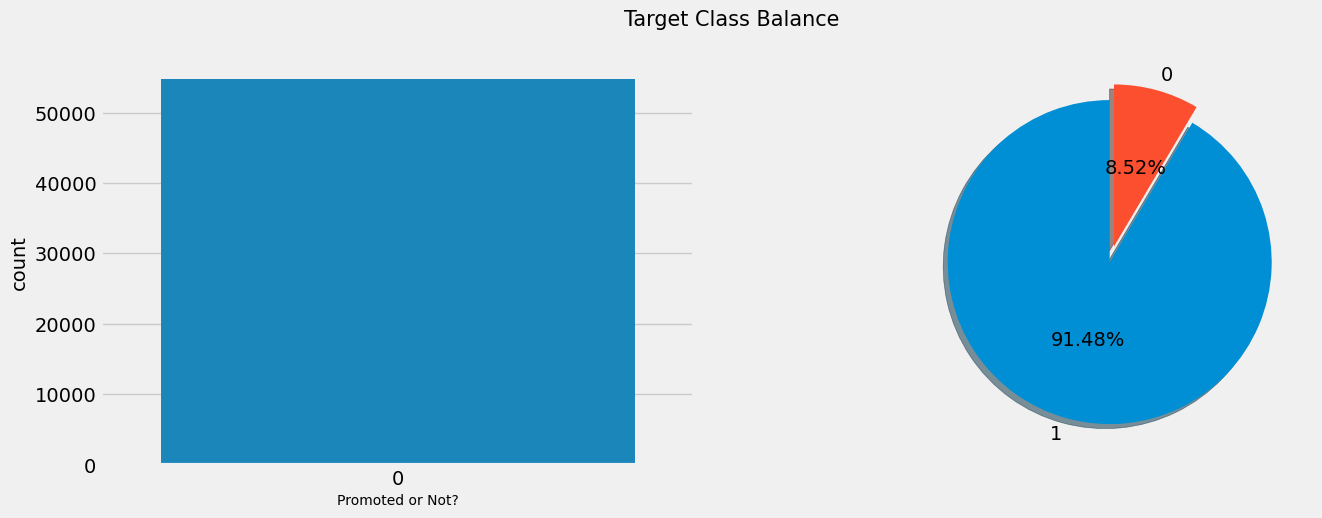

In [6]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

The data is an imbalanced dataset with only less than 10% of the people actually getting promotions.
Since, this is an imbalanced dataset - if done incorrectly, the results can come out very poor.

Given that there are so many missing values, how should they taken care of? The answer is imputation

Different types of imputations are present based on mean, median or other important statistical values.
 - When to use mean and when to use median?
 
1. We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
2. We use Median, when we have outliers in the dataset for the Numerical Variables.
3. We use Mode, When we have Categorical Variables.


In [7]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [8]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


Outlier Detection:

Searching for the presence of an outlier is an important thing and is to be done - else the developed model won't be accurate enough

For Numerical Variables : Various methods are there to detect the outliers 1 such thing is boxplots

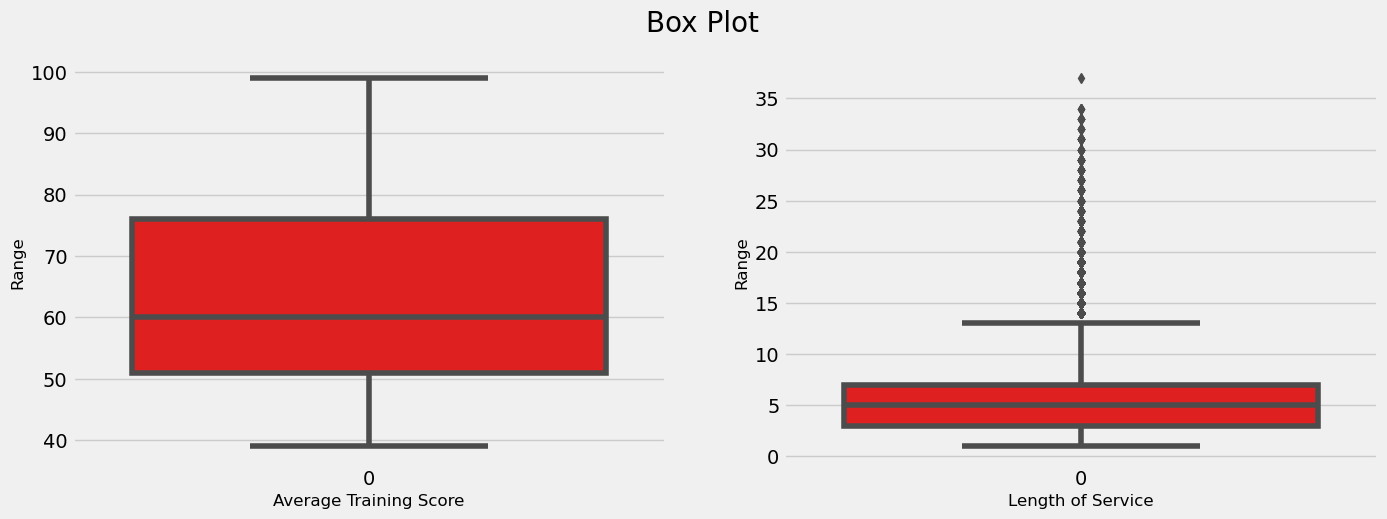

In [9]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

From the boxplots, the average training score seems to not have any outliers. But the length of service, over 13 are all outliers as they are present outside the max value. But since the number of values are very less, they need not make much contributions.

Univariate Analysis: to get more insights from the data

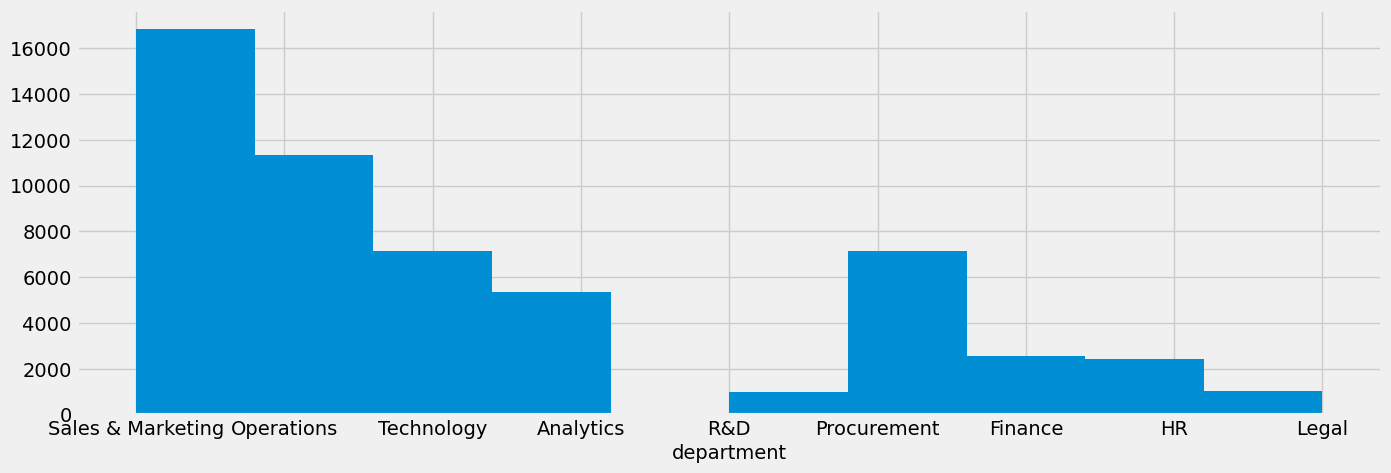

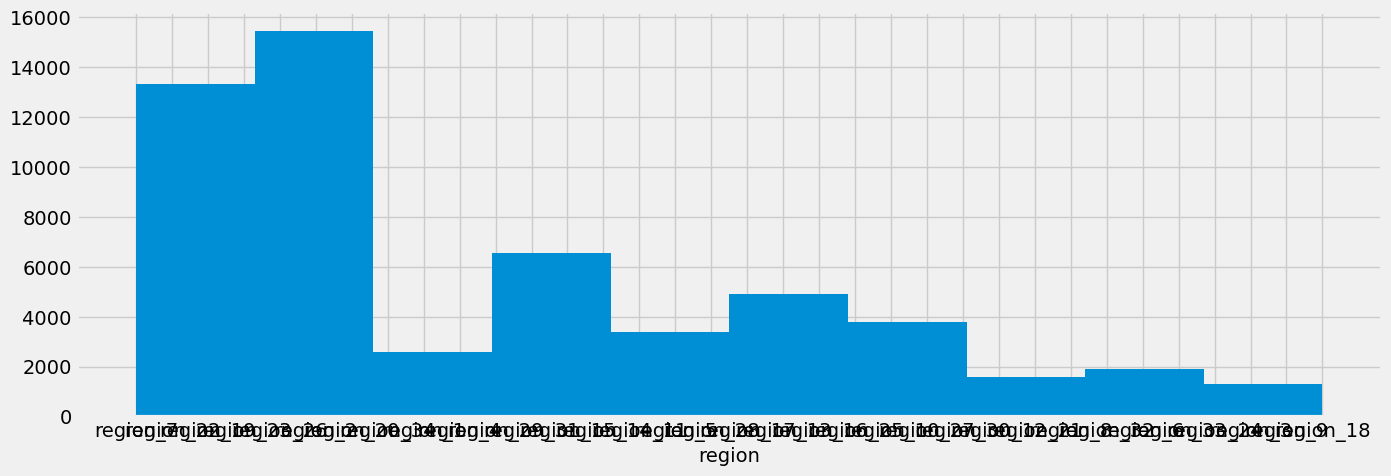

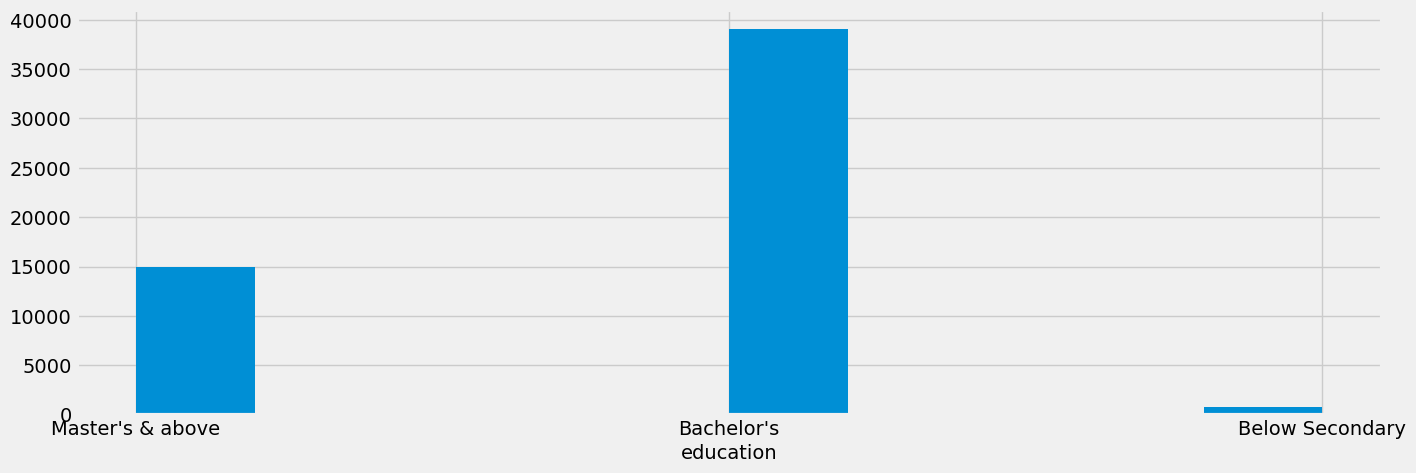

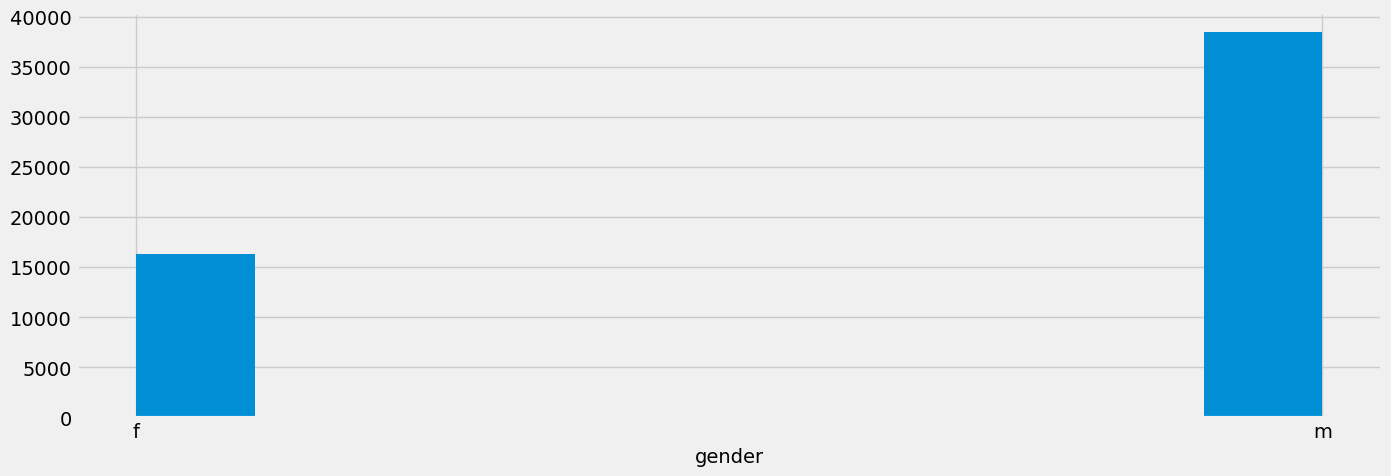

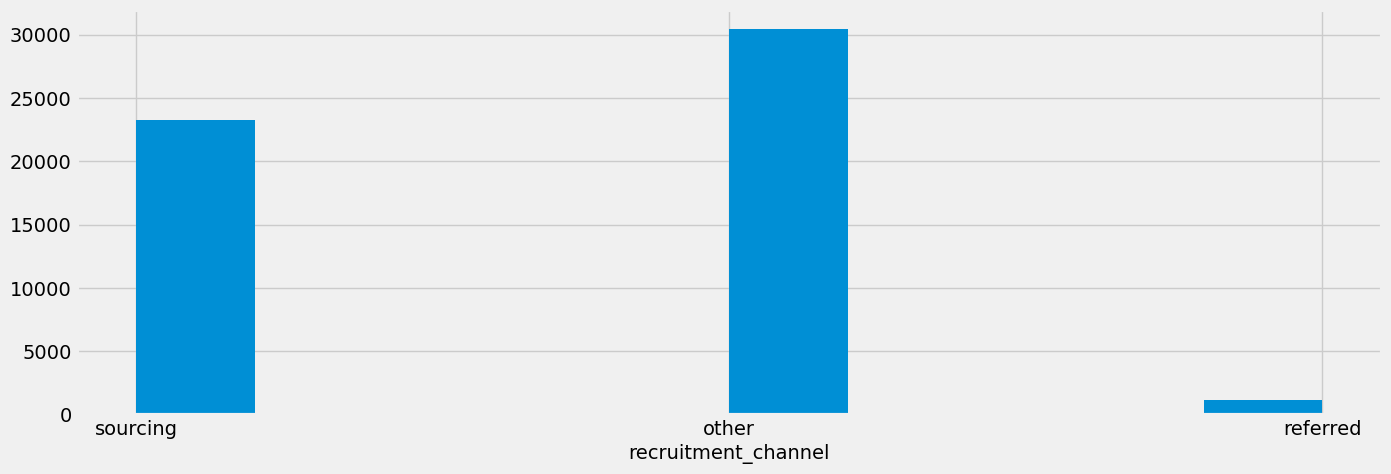

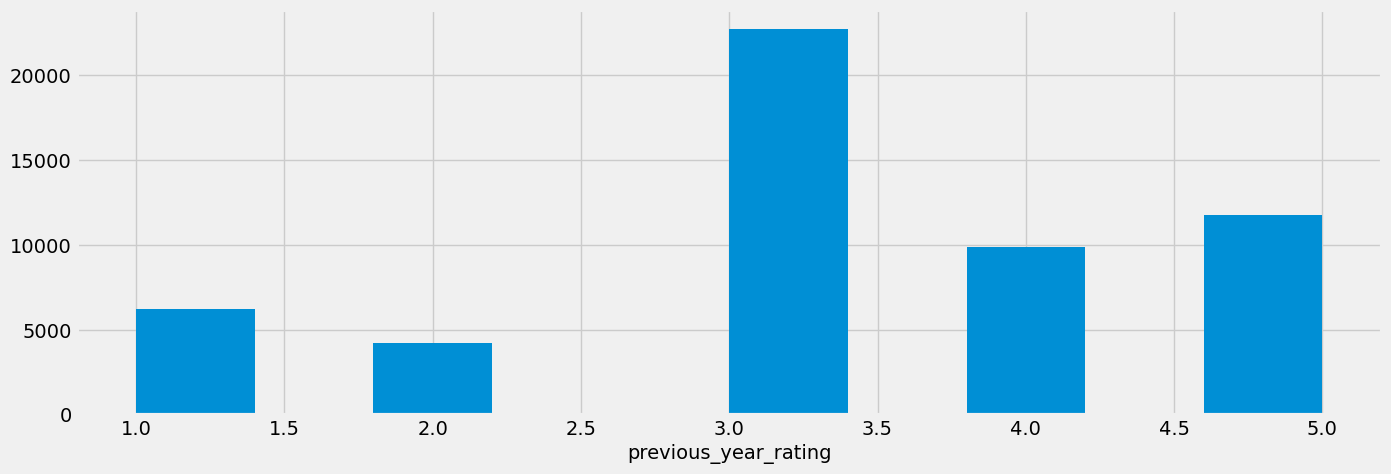

In [10]:
# ploting histograms
for c in train.columns.values:
  if (train[c].dtypes == 'float64') or (train[c].dtypes == 'object'):
    plt.hist(train[c])
    plt.xlabel(c)
    plt.show()

The distribution is present normally for all features and not stagnant. So, all features are important.

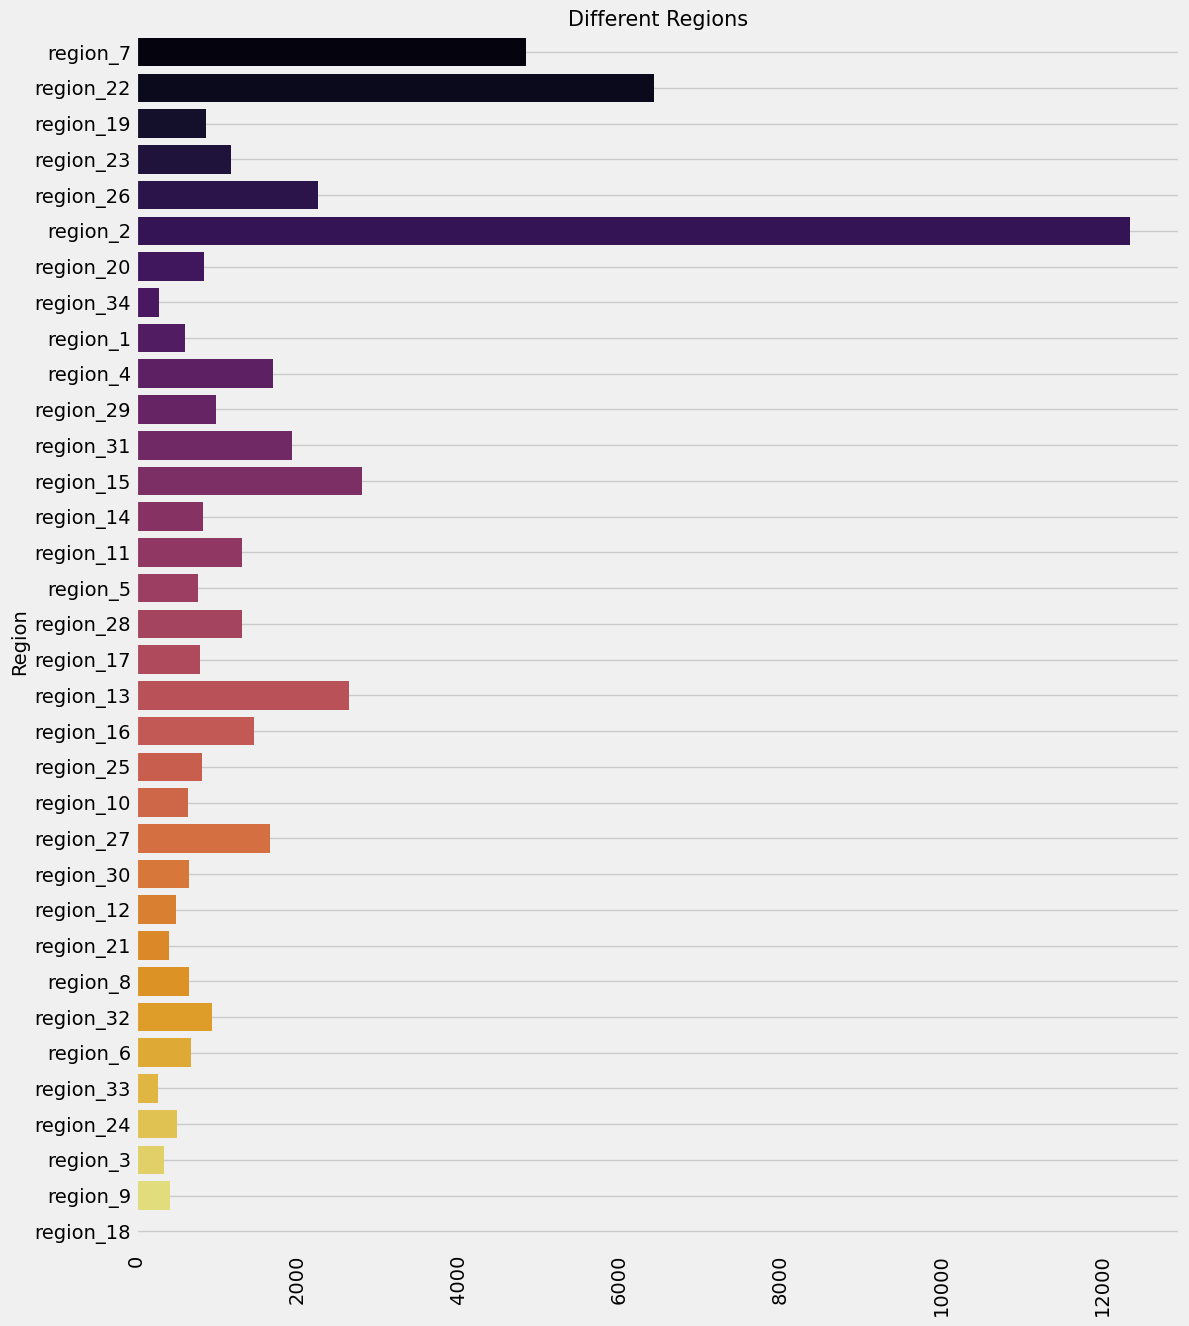

In [11]:
plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Bivariate Analysis: Determining empirical relation between different variables. 

First, we will perform Categorical vs Categorical Analysis using Stacked and Grouped Bar Charts with the help of crosstab function.

Second, we will perform Categorical vs Numerical Analysis using Bar Charts, Box plots, Strip plots, Swarm plots, Boxen plots, Violin Plots, etc
Atlast, we will perform Numerical vs Numerical Analysis using Scatter plots.

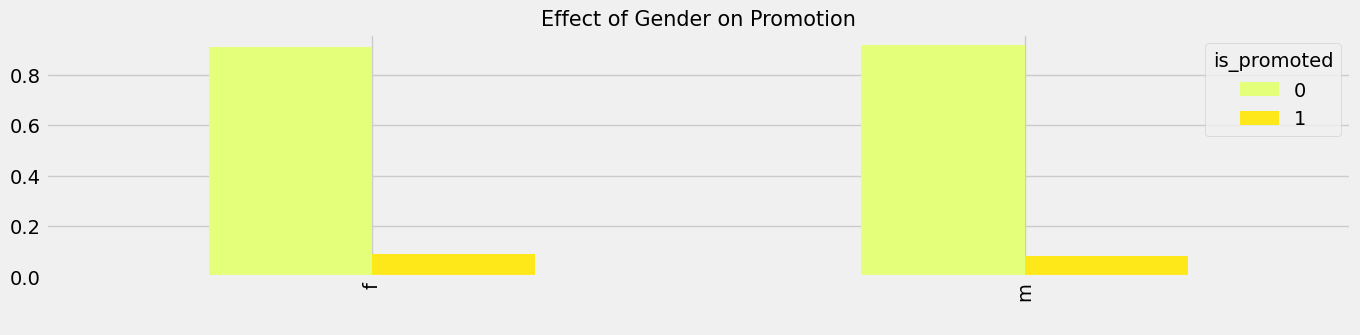

In [12]:
# Lets compare the Gender Gap in the promotion

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False, color = colors)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

Females are in Minority, but when it comes to Promotion, they are competing with their Men Counterparts neck-to-neck

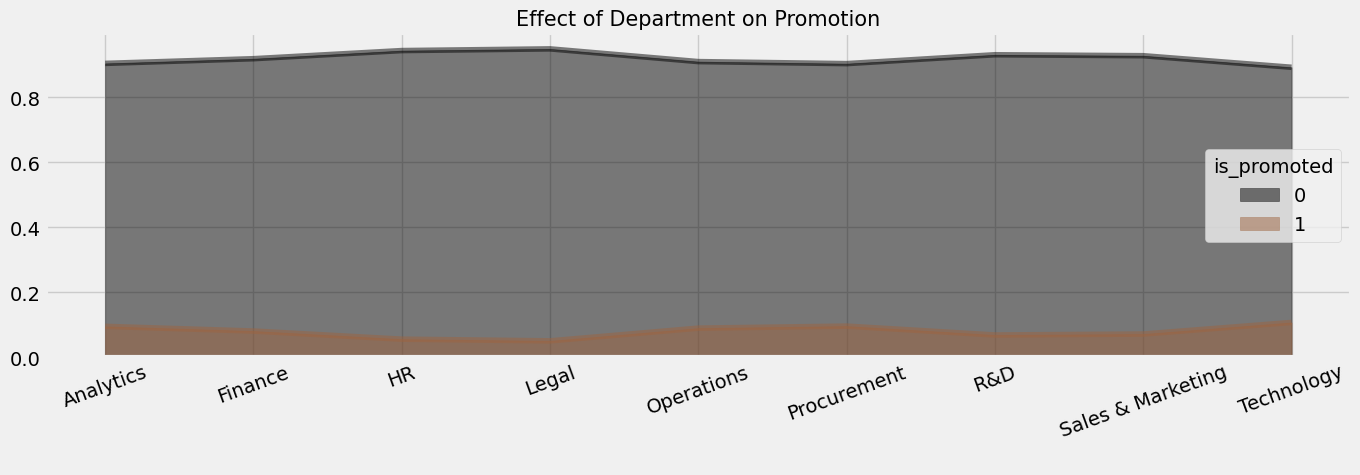

In [13]:
# lets compare the effect of different Departments and Promotion

plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False, color = colors)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()

Almost all the Departments have a very similar effect on Promotion. this column comes out to be lesser important in making a Machine Learning Model, as it does not contribute at all when it comes to Predicting whether the Employee should get Promotion.

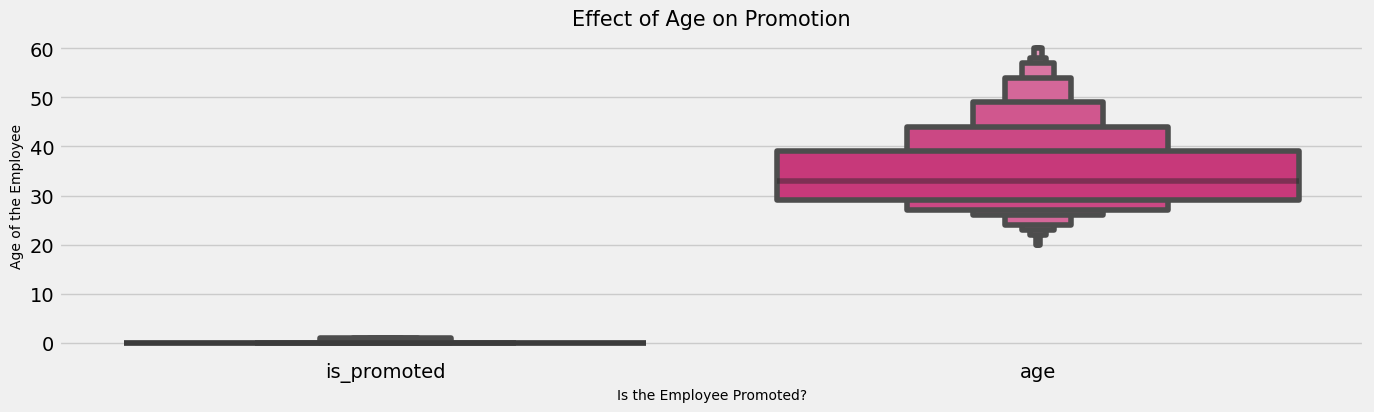

In [14]:
# Effect of Age on the Promotion

plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train[['is_promoted','age']], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

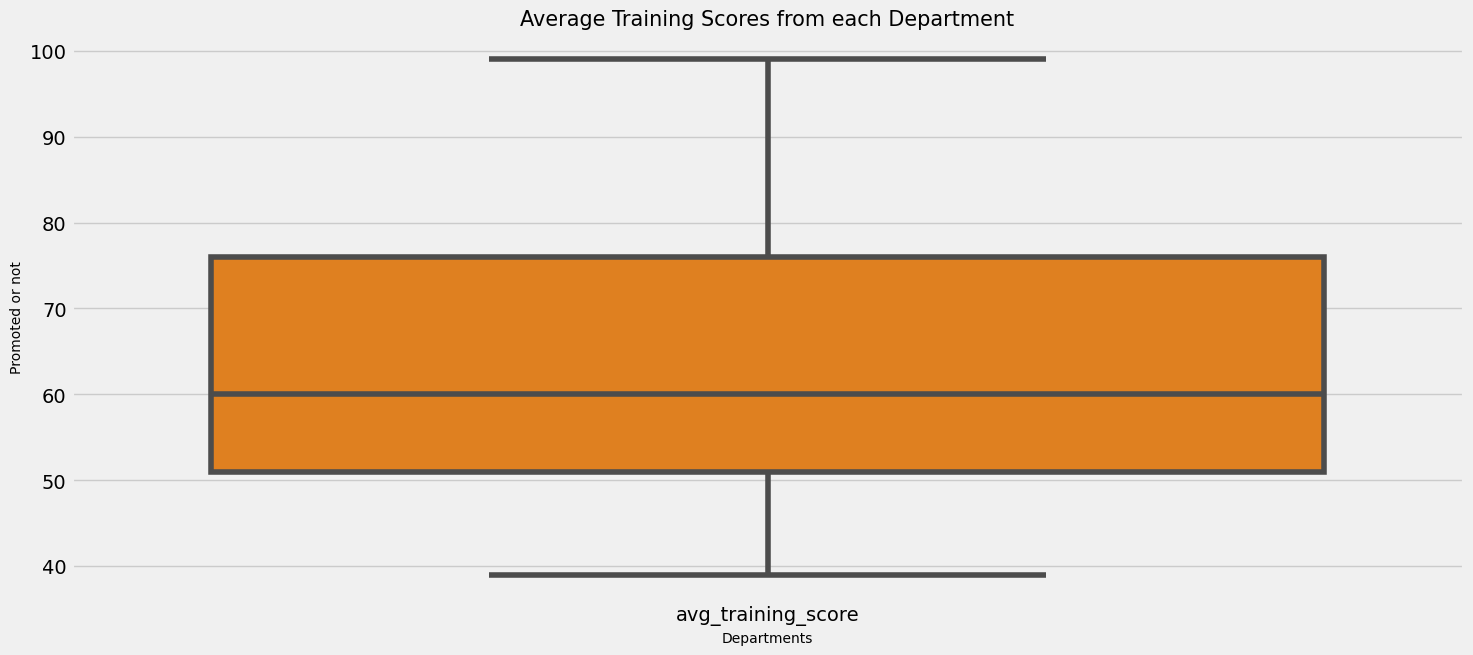

In [15]:
# Department Vs Average Training Score

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train[['department','avg_training_score']], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

Multivariate Analysis:

First, we will use the Correlation Heatmap to check the correlation between the Numerical Columns
Then we will check the ppscore or the Predictive Score to check the correlation between all the columns present in the data.
Then, we will use Bubble Charts, split Violin plots, Hue with Bivariate Plots.

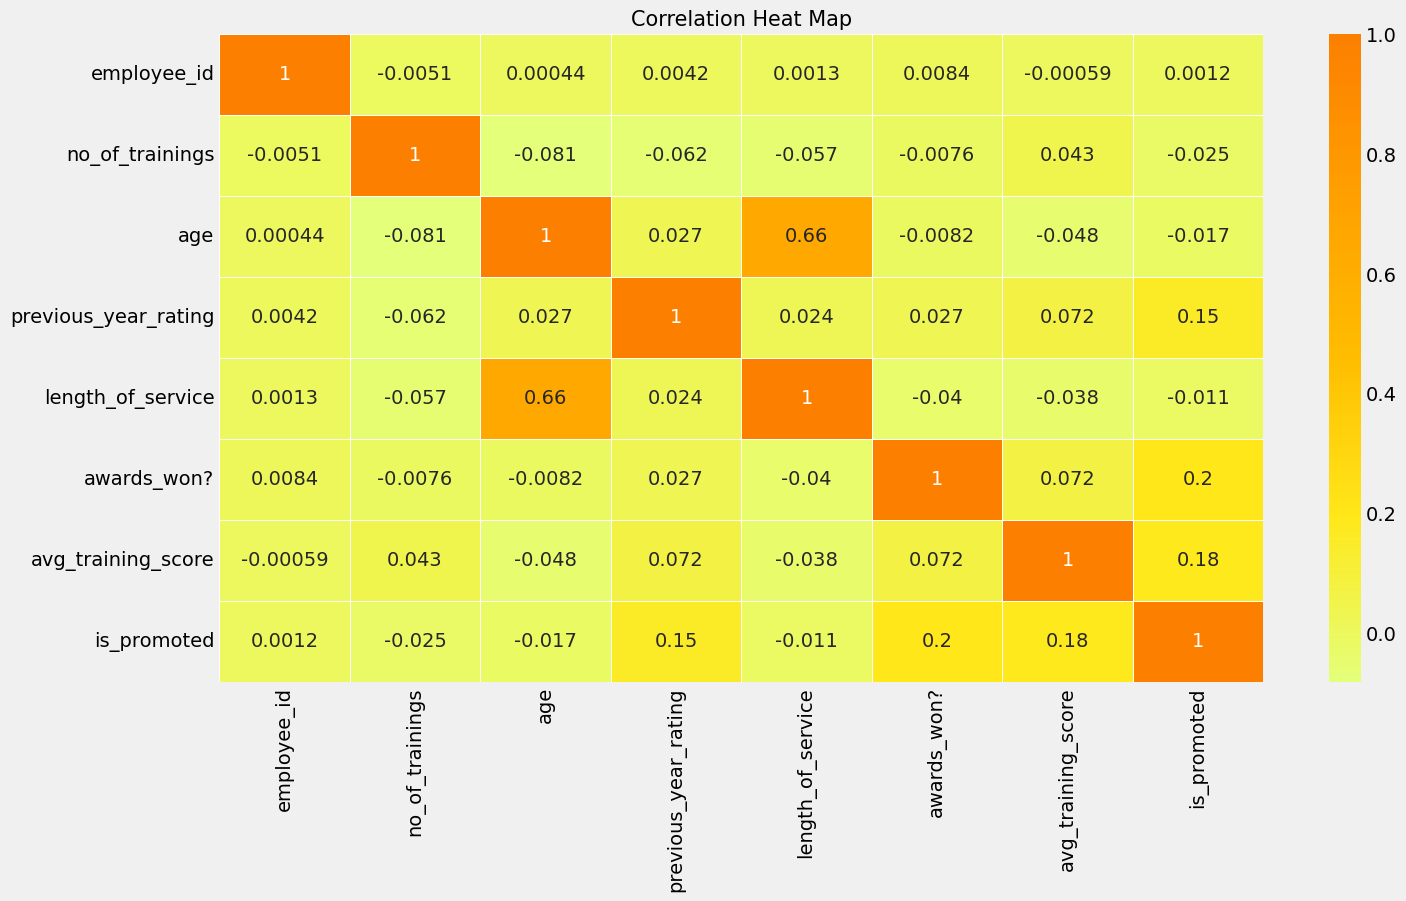

In [16]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

In [18]:
# lets check the relation of Departments and Promotions when they won awards ?

# plt.rcParams['figure.figsize'] = (16, 7)
# sns.barplot(train['department'], train['avg_training_score'], hue = train['gender'], palette = 'autumn')
# plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
# plt.ylabel('Promoted or not', fontsize = 10)
# plt.xlabel('Departments', fontsize = 10)
# plt.show()

Feature Engineering:

Process of using domain knowledge to extract features from raw data via data mining techniques.

1. We can perform Feature Engineering by Removing Unnecassary Columns
2. We can do it by Extracting Features from the Date and Time Features.
3. We can do it by Extracting Features from the Categorcial Features.
4. We can do it by Binnning the Numerical and Categorical Features.
5. We can do it by Aggregating Multiple Features together by using simple Arithmetic operations

In [19]:
# lets create some extra features from existing features to improve our Model

# creating a Metric of Sum
train['sum_metric'] = train['awards_won?'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?'] + test['previous_year_rating']

# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [21]:
# lets remove some of the columns which are not very useful for predicting the promotion.

# we already know that the recruitment channel is very least related to promotion of an employee, so lets remove this column
# even the region seems to contribute very less, when it comes to promotion, so lets remove it too.
# also the employee id is not useful so lets remove it.

train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

# lets check the columns in train and test data set after feature engineering
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'awards_won?',
       'avg_training_score', 'is_promoted', 'sum_metric', 'total_score'],
      dtype='object')

In [22]:
train = train.drop(train[(train['previous_year_rating'] == 1.0) & (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

Encoding categorical columns:

1. This is an Essential Step, as we Machine Learning Models only works with Numerical Values.
2. Here, we are going to use Business Logic to encode the education column
3. Then we will use the Label Encoder, to Department and Gender Columns

In [23]:
train.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [24]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [25]:
train.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,0,49,0,5.0,49
1,4,2,1,1,30,5.0,4,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,50,0,3.0,50


Splitting the data:

We store the Target Variable in y, and then we store the rest of the columns in x, by deleting the target column from the data
Also, we are changing the name of test dataset to x_test for ease of understanding.

In [26]:
# lets split the target data from the train data

y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

# lets print the shapes of these newly formed data sets
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (54790, 11)
Shape of the y : (54790,)
Shape of the x Test : (23490, 11)


Resampling:

Method that consists of drawing repeated samples from the original data samples. The method of Resampling is a nonparametric method of statistical inference.

1. Earlier, in this Problem we noticed that the Target column is Highly Imbalanced, we need to balance the data by using some Statistical Methods.
2. There are many Statistical Methods we can use for Resampling the Data such as:
  1. Over Samping
  2. Cluster based Sampling
  3. Under Sampling.
  
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set

1. We are going to use Over Sampling.
2. We will not use Under Sampling to avoid data loss.

In [30]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(100280, 11)
(100280,)


In [31]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    50140
1     4650
Name: is_promoted, dtype: int64
After Resampling :
0    50140
1    50140
Name: 0, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (80224, 11)
Shape of the y Train : (80224, 1)
Shape of the x Valid : (20056, 11)
Shape of the y Valid : (20056, 1)
Shape of the x Test : (23490, 11)


Feature Scaling:

1. Normalize the range of independent variables or features of data
2. it is also known as data normalization and is generally performed during the data preprocessing step

In [33]:
# It is very import to scale all the features of the dataset into the same scale
# Here, we are going to use the standardization method, which is very commonly used.

# lets import the standard scaler library from sklearn to do that
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

Decision Tree Classifier:

tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [34]:
# Lets use Decision Trees to classify the data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

Training Accuracy : 0.9783605903470283
Testing Accuracy : 0.9108496210610291


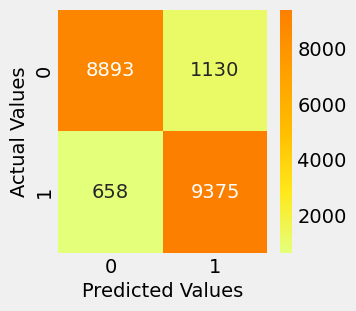

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [36]:
# lets take a look at the Classification Report

cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10023
           1       0.89      0.93      0.91     10033

    accuracy                           0.91     20056
   macro avg       0.91      0.91      0.91     20056
weighted avg       0.91      0.91      0.91     20056



In [37]:
train.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.00000,54790.000000,54790.000000
mean,4.972367,2.257638,0.702300,1.253057,34.803888,3.305238,5.864866,0.023179,63.390290,0.08487,3.328418,79.777897
std,2.506223,0.469734,0.457251,0.609332,7.660646,1.214251,4.264926,0.150474,13.372075,0.27869,1.227491,43.883939
min,0.000000,1.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.00000,1.000000,39.000000
25%,4.000000,2.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.00000,3.000000,53.000000
50%,5.000000,2.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.00000,3.000000,64.000000
75%,7.000000,3.000000,1.000000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.00000,4.000000,84.000000
max,8.000000,3.000000,1.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.00000,6.000000,710.000000


In [38]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(model, step=1, cv=5)
selector = rfecv.fit(x_train, y_train)

In [40]:
prediction = selector.predict(np.array([[2, #department code
                                      3, #masters degree
                                      1, #male
                                      1, #1 training
                                      30, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      1, #awards won
                                      95, #avg training score
                                      7, #sum of metric 
                                      700 #total score
                                     ]]))

print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [1]


In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

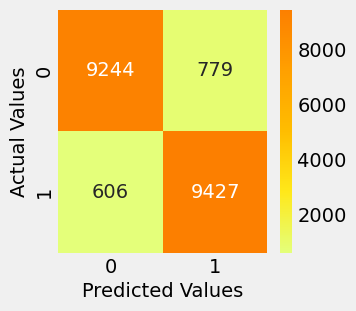

In [42]:
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_valid)

cm = confusion_matrix(y_valid, y_pred1)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cr1 = classification_report(y_valid, y_pred1)
print(cr1)

In [ ]:
score = model1.score(x_valid, y_valid)
score